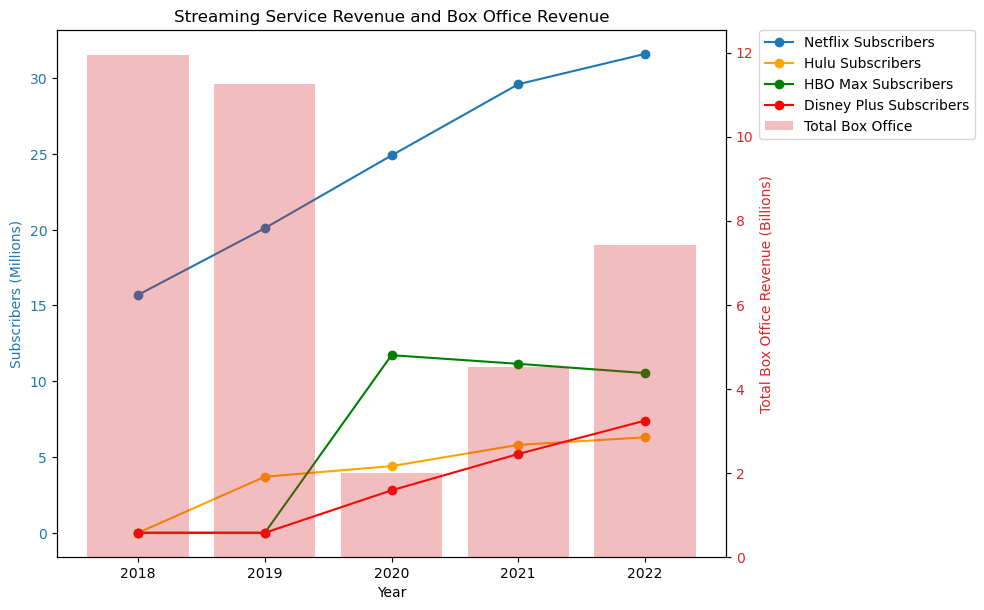

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import the ticker module for formatting tick labels

# Create dataframes from the provided data
subscribers_data = pd.DataFrame({
    'Year': [2018, 2019, 2020, 2021, 2022],
    'Netflix': [15.7, 20.1, 24.9, 29.6, 31.6],
    'Hulu': [0, 3.7, 4.4, 5.8, 6.3],
    'HBO Max': [0, 0, 11.72, 11.15, 10.54],
    'Disney Plus': [0, 0, 2.8, 5.2, 7.4]
})

box_office_data = pd.DataFrame({
    'Year': [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
             2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995],
    'Total Box Office': [9710109274, 7425608770, 4514298818, 1988111579, 11245494999, 11941248262,
                         10993225666, 11264154534, 11153776110, 10271788081, 10887356155, 11007242918,
                         10173568793, 10483766514, 10639257284, 9750794626, 9770087282, 9179124447,
                         8800805718, 9285881957, 9193277289, 9155147215, 8296854718, 7532311479,
                         7338894852, 6770273245, 6230405144, 5769092462, 5314550785]
})

# Divide box office by 1 billion
box_office_data['Total Box Office'] /= 1000000000

# Merge the dataframes based on 'Year'
merged_data = subscribers_data.merge(box_office_data, on='Year')

# Create a line graph and a bar graph
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Subscribers (Millions)', color=color)
ax1.plot(merged_data['Year'], merged_data['Netflix'], marker='o', label='Netflix Subscribers', color=color)
ax1.plot(merged_data['Year'], merged_data['Hulu'], marker='o', label='Hulu Subscribers', color='orange')
ax1.plot(merged_data['Year'], merged_data['HBO Max'], marker='o', label='HBO Max Subscribers', color='green')
ax1.plot(merged_data['Year'], merged_data['Disney Plus'], marker='o', label='Disney Plus Subscribers', color='red')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Total Box Office Revenue (Billions)', color=color)  # we already handled the x-label with ax1
ax2.bar(merged_data['Year'], merged_data['Total Box Office'], color=color, alpha=0.3, label='Total Box Office')
ax2.tick_params(axis='y', labelcolor=color)

# Combine the legends from both axes and place it outside the chart with a more compact size
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
combined_labels = labels + bar_labels
combined_handles = lines + bars
ax1.legend(combined_handles, combined_labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Streaming Service Revenue and Box Office Revenue')
plt.show()
